In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('/content/breast-cancer.csv')

In [ ]:
x = data.drop('diagnosis', axis=1).values
y = data['diagnosis'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.02,random_state=0)
#scaling the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)


In [ ]:
model.score(x_train, y_train)

0.37881508078994613

In [ ]:
model.score(x_test, y_test)

1.0

In [ ]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
df=data
df['diagnosis'] = df['diagnosis'].replace({'B': 1, 'M': 0})

In [ ]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

<Axes: >

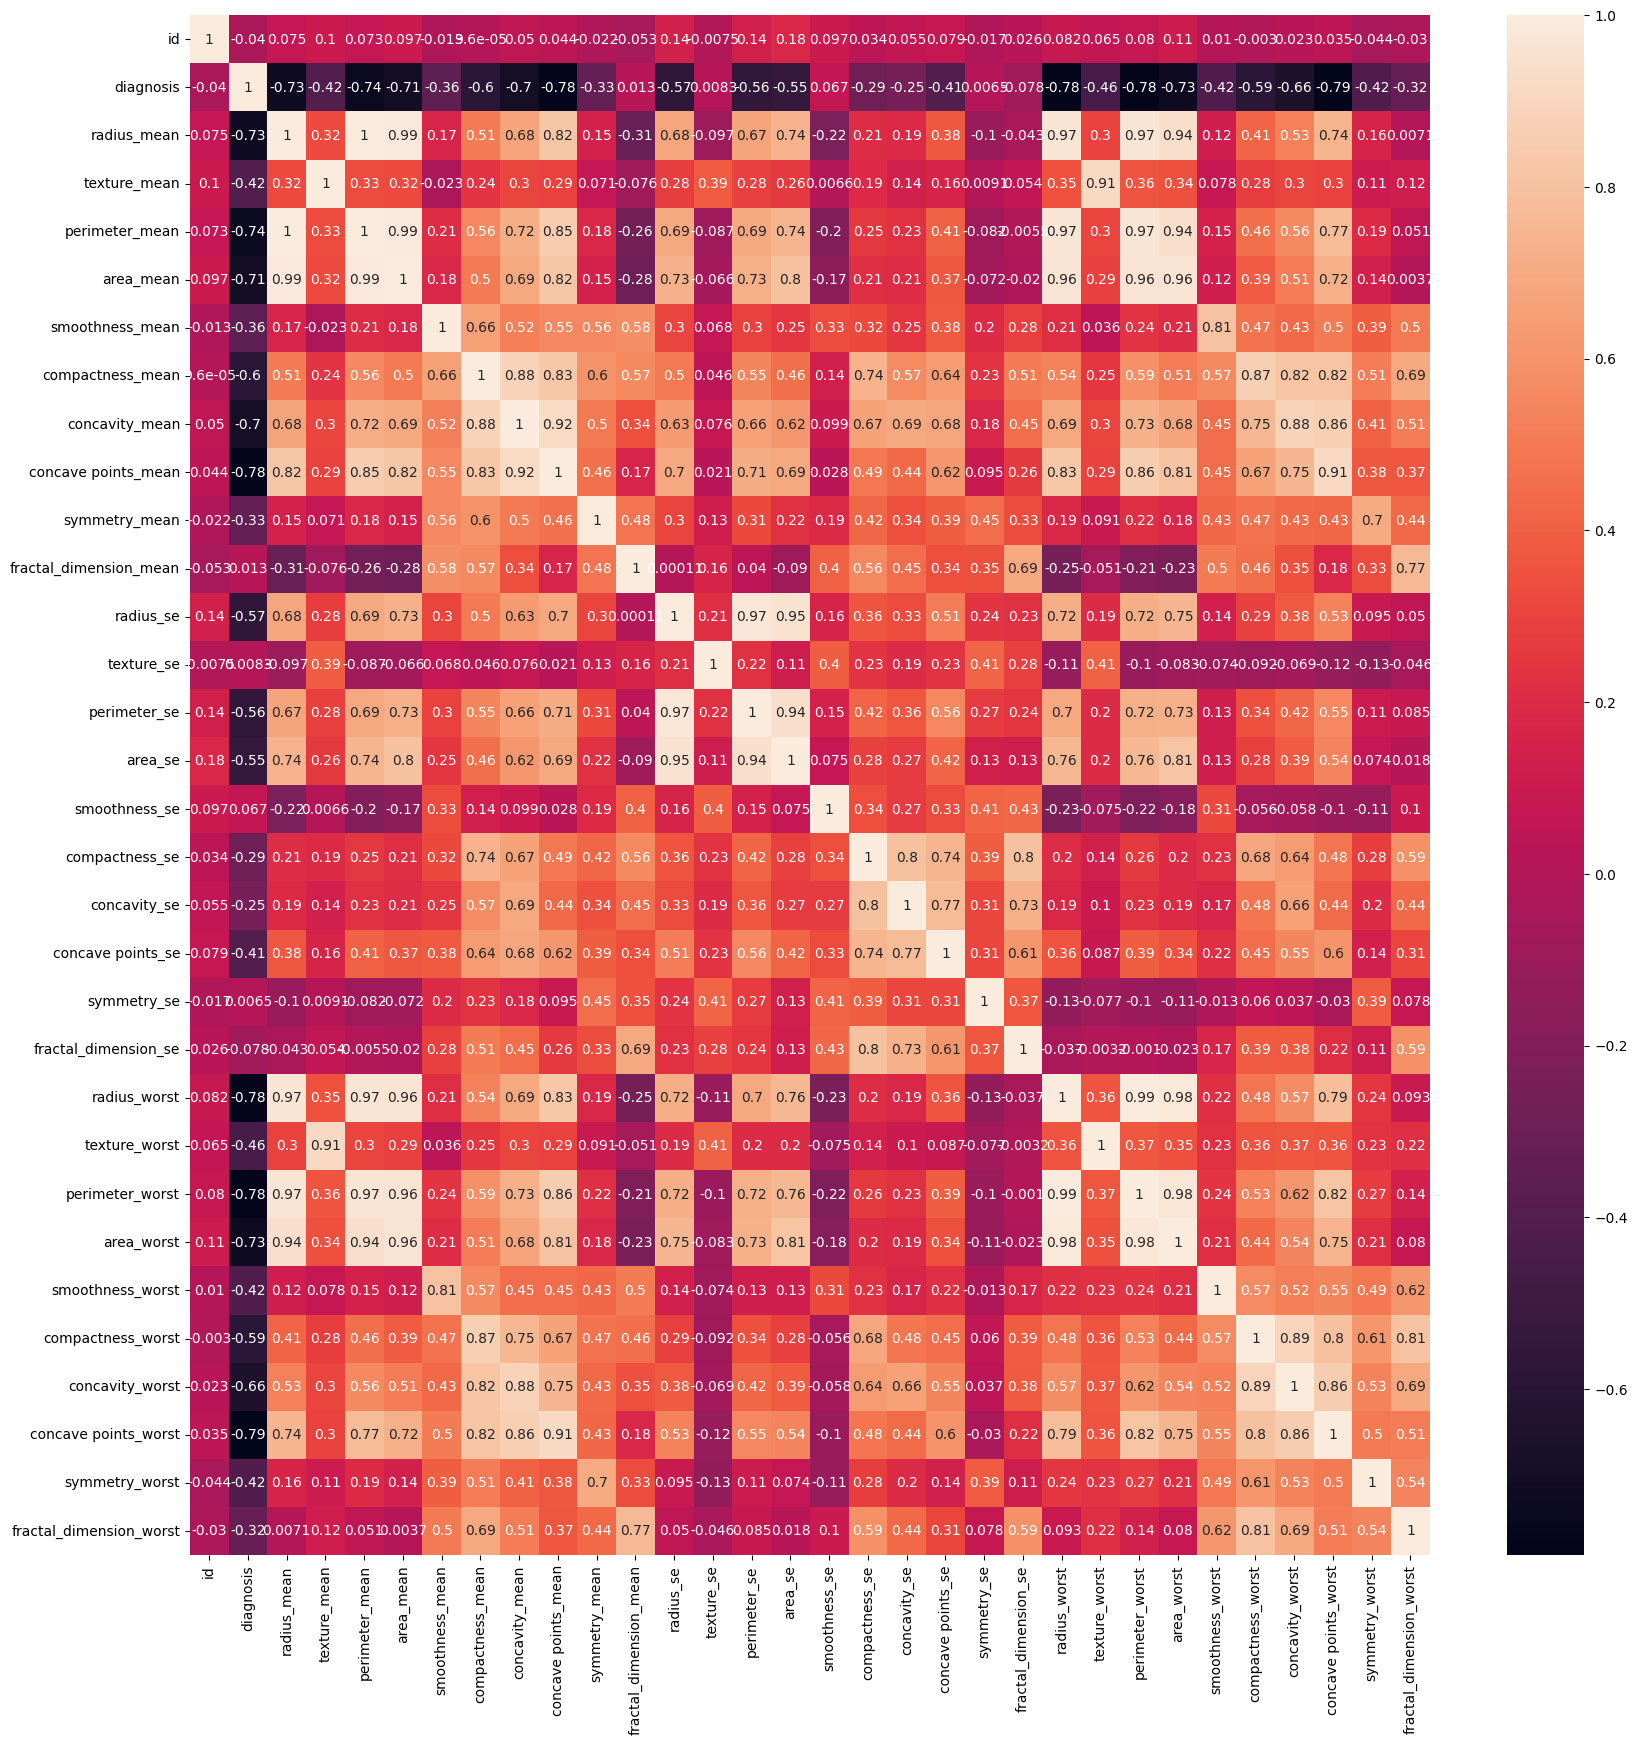

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)


In [ ]:
df = df.drop(['id'], axis = 1)

In [ ]:
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
xtrain, xtest, ytrain ,ytest = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 100)
lr.fit(xtrain, ytrain)
lr_pred = lr.predict(xtest)
accuracy_score(ytest, lr_pred), confusion_matrix(ytest, lr_pred)

(0.9790209790209791,
 array([[53,  1],
        [ 2, 87]]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200,random_state = 100)
rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xtest)
accuracy_score(ytest, rf_pred), confusion_matrix(ytest, rf_pred)

(0.972027972027972,
 array([[51,  3],
        [ 1, 88]]))

In [ ]:
from sklearn.svm import SVC
svc = SVC(probability=True, random_state = 100)
svc.fit(xtrain, ytrain)
svc_pred = svc.predict(xtest)
accuracy_score(ytest, svc_pred), confusion_matrix(ytest, svc_pred)

(0.972027972027972,
 array([[52,  2],
        [ 2, 87]]))

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.1, objective='binary:logistic', random_state = 100)
xgb.fit(xtrain, ytrain)
xgb_pred = xgb.predict(xtest)
accuracy_score(ytest, xgb_pred), confusion_matrix(ytest, xgb_pred)

(0.9790209790209791,
 array([[52,  2],
        [ 1, 88]]))

In [ ]:
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=[('lr', lr), ('rf', rf), ('svc', svc), ('xgb', xgb)], final_estimator=XGBClassifier(n_estimators=1000, learning_rate=0.001, objective='binary:logistic',random_state = 100))
sc.fit(xtrain, ytrain)
sc_pred = sc.predict(xtest)
accuracy_score(ytest, sc_pred), confusion_matrix(ytest, sc_pred)

(0.986013986013986,
 array([[53,  1],
        [ 1, 88]]))

<Axes: xlabel='Label', ylabel='Value'>

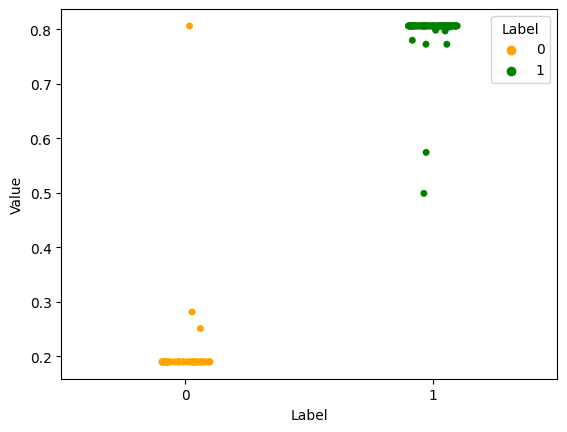

In [ ]:
sc_prob = sc.predict_proba(xtest)
data = {'Value': sc_prob[:,1],
        'Label': ytest}
df_final = pd.DataFrame(data)
palette = {0: 'orange', 1: 'green'}
sns.stripplot(x='Label', y='Value', data=df_final, hue='Label', palette=palette)

In [ ]:
boundary = 0.4
y_pred_class = np.where(sc_prob >= boundary, 1, 0)
accuracy_score(y_pred_class[:,1], ytest), confusion_matrix(y_pred_class[:,1], ytest)

(0.993006993006993,
 array([[53,  0],
        [ 1, 89]]))